<a href="https://colab.research.google.com/github/LSY-0412/WebPractice/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [ ]:
부모님의 학력, 인종, 성별 등의 정보가 나와있는 학생들의 수학, 읽기, 쓰기 성적률을 기록한 데이터를 이용하였습니다.

In [77]:
df = pd.read_csv('https://raw.githubusercontent.com/LSY-0412/WebPractice/main/Student%20Performance%20new.csv')

df = df[['sex', 'race/ethnicity', 'parental level of education','lunch','test preparation course','math percentage','reading score percentage','writing score percentage']]

def average_percentage(dt):
  return (dt['math percentage'] + dt['reading score percentage'] + dt['writing score percentage'])/3

df['average percentage'] = df.apply(average_percentage, axis=1)
df.head()

,sex,race/ethnicity,parental level of education,lunch,test preparation course,math percentage,reading score percentage,writing score percentage,average percentage
0,F,group B,bachelor's degree,standard,none,0.72,0.72,0.74,0.726667
1,F,group C,some college,standard,completed,0.69,0.90,0.88,0.823333
2,F,group B,master's degree,standard,none,0.90,0.95,0.93,0.926667
3,M,group A,associate's degree,free/reduced,none,0.47,0.57,0.44,0.493333
4,M,group C,some college,standard,none,0.76,0.78,0.75,0.763333


데이터의 결측값을측정결과, 결측값은 없었습니다.

In [78]:
df.isnull().sum()

sex                            0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math percentage                0
reading score percentage       0
writing score percentage       0
average percentage             0
dtype: int64

In [79]:
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

https://wikidocs.net/92114 부모님의 학력 비율을 나타내는 원형 그래프입니다.

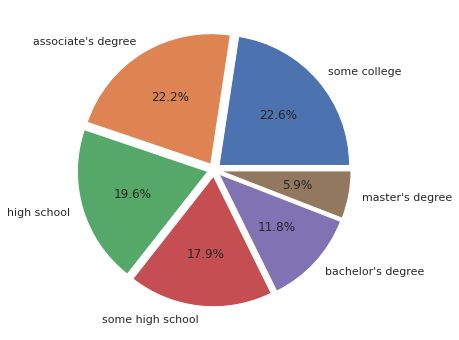

In [80]:
typeCount = df['parental level of education'].value_counts(normalize=True)

fig, ax = plt.subplots(figsize=(6,6))

ax.pie(typeCount,
       labels=typeCount.index,
       autopct='%1.1f%%',
       explode=[.05, .05, .05, .05, .05, .05]
       )
plt.show()

https://rfriend.tistory.com/411
부모님의 학력에 따라 학생들의 수학, 읽기, 쓰기 평균 점수가 얼마나 차이가나는지 보여주는 그래프입니다. 평균이 가장 낮은 그룹은 학력이 high school이였던 그룹이였고, 가장 높은 그룹은 master's degree였습니다.

<BarContainer object of 6 artists>

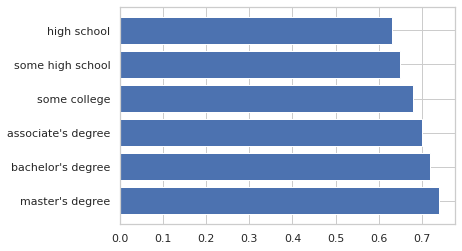

In [81]:
pt = df.groupby("parental level of education")["average percentage"].mean().round(2)
pt = pt.sort_values(ascending = False)

plt.barh(pt.index,pt)